У цьому домашньому завданні ми продовжуємо працювати з набором даних `Yulu`, з яким почали працювати в "hw 4.3. Робота з DataFrame. Діаграма розсіювання.". 

Фокус: провести 3 самостійних аналізи на даних Yulu, кожен з яких має використовувати одну (або кілька) з освоєних нами візуалізацій і супроводжуватись висновками з побудованої візуалізації. 1 аналіз - це відповідь на поставлене питання до даних.

Документація до тої частини бібліотеки, з якою тут працюємо

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів



In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [102]:
sns.set_theme(style="whitegrid")

In [100]:
import os
os.listdir()

['hw_4_5_Візуалізація_з_seaborn.ipynb',
 'figure_2.png',
 'figure_3.png',
 'figure_1.png',
 'my_figure.png',
 'hw_4_3_Робота_з_DataFrame_Діаграма_розсіювання.ipynb',
 'Lecture_4_Data_Visualisation.ipynb',
 'hw_4_1_Базові_візуалізації.ipynb',
 '.ipynb_checkpoints',
 'hw_4_2_Базові_візуалізації_Продовження.ipynb',
 'hw_4_5_Візуалізація_з_seaborn_Solutons.ipynb',
 'hw_4_4_Візуалізація_з_pandas.ipynb',
 'Творче завдання_Візуалізація_з_seaborn.ipynb']

In [10]:
os.listdir('../data/')

['.DS_Store',
 'health_insurance_cross_sell_prediction.csv',
 'yulu_rental.csv',
 'supermarket_sales.csv']

In [19]:
data_path = '../data/yulu_rental.csv'
df = pd.read_csv(data_path)
df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


1. Як середня кількість прокатів змінюється по сезонах?

In [31]:
season_avg = df.groupby('season')['count'].mean().reset_index() #reset_index() перетворює Series у DataFrame, де одна колонка — це "season", а інша — "count
season_avg

,season,count
0,1,116.343261
1,2,215.251372
2,3,234.417124
3,4,198.988296


In [111]:
max_value = season_avg['count'].max()
min_value = season_avg['count'].min()
max_value, min_value

(234.417124039517, 116.34326135517499)

In [126]:
max_value = round(max_value, 1)
min_value = round(min_value, 1)
max_value, min_value

(234.4, 116.3)

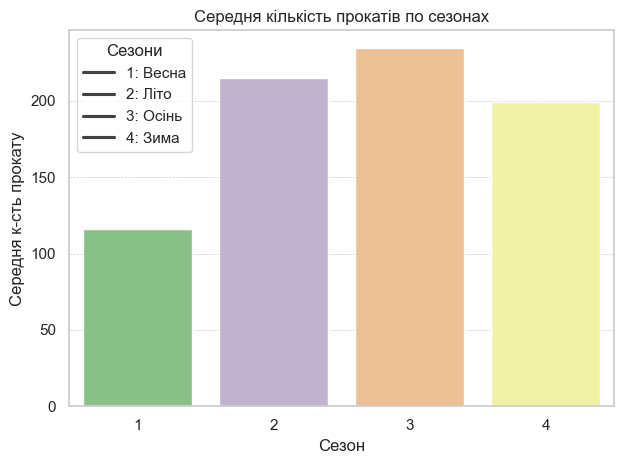

In [128]:
sns.barplot(data=season_avg, x='season', y='count', hue='season', palette="Accent")
plt.title("Середня кількість прокатів по сезонах")
plt.xlabel("Сезон")
plt.ylabel("Середня к-сть прокату")
season_dictionary = {1: 'Весна', 2: 'Літо', 3: 'Осінь', 4: 'Зима'}
plt.grid(axis='y', which='both', linestyle='--', linewidth=0.5)
plt.legend(title="Сезони", labels=[f"{number}: {name}" for number, name in season_dictionary.items()], loc="best")

plt.tight_layout()
plt.show()

**Відповідь**
Найбільша середня кількість прокатів восени 234.4, найменша - весна 116.3.


Давайте обговоримо - ***як виконати наш план +20% у 2025 році? чи готові ми до сезонності?***

In [ ]:
2. Як впливає вологість на кількість незареєстрованих користувачів?


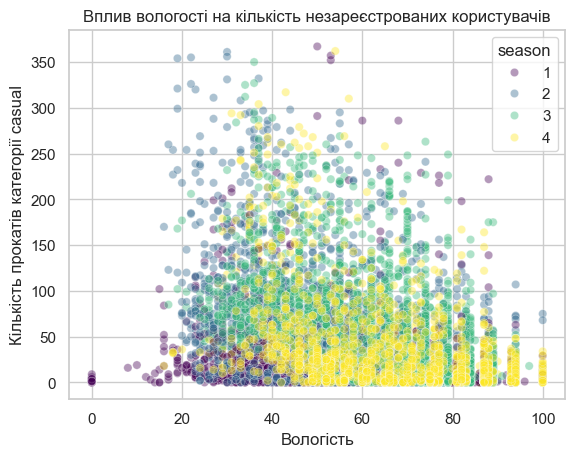

In [143]:
sns.scatterplot(data=df, x='humidity', y='casual', hue='season', palette='viridis', alpha=.4)
plt.title("Вплив вологості на кількість незареєстрованих користувачів")
plt.xlabel("Вологість")
plt.ylabel("Кількість прокатів категорії casual")
plt.show()

**Відповідь**


Кількість  користувачів велосипедів на прокат без реєстрації при нижчому рівні вологості зростає.

Категорії сезонності: пори року, позначені кольором, показують переважання різних пір року та сезонності в пунктах оренди.

Викиди: помітні викиди при вологості 0 та 100. 


3. Як швидкість вітру впливає на кількість прокатів?

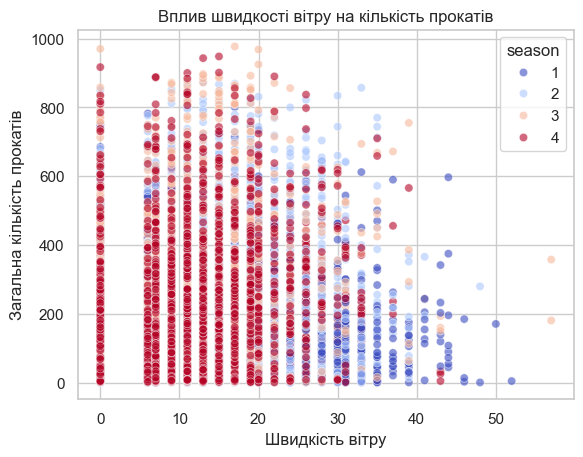

In [147]:
sns.scatterplot(data=df, x='windspeed', y='count', hue='season', palette='coolwarm', alpha=0.6)
plt.title("Вплив швидкості вітру на кількість прокатів")
plt.xlabel("Швидкість вітру")
plt.ylabel("Загальна кількість прокатів")
plt.show()

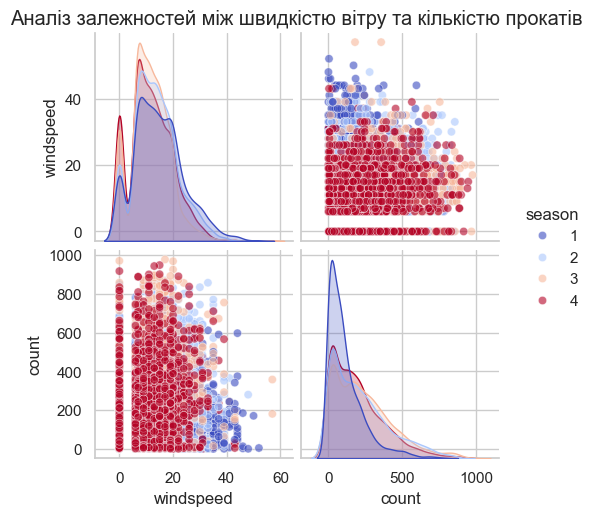

In [149]:
# Використовуємо pairplot для аналізу залежностей між кількома змінними
sns.pairplot(df[['windspeed', 'count', 'season']], hue='season', palette='coolwarm', plot_kws={'alpha': 0.6})
plt.suptitle("Аналіз залежностей між швидкістю вітру та кількістю прокатів", y=1.02)
plt.show()

**Відповідь**
Ви можете помітити, що прокати найчастіше відбуваються при низькій швидкості вітру. Є пряма кореляція між сезонністю та швидкістю вітру. Взимку при швидкості вітру більше 30м/с замовлень практично відсутні. 